# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


### Installing Required Libraries

In [23]:
!pip install pandas matplotlib seaborn folium

### Importing the required libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

In [25]:
%matplotlib inline

# Importing Data

In [26]:
# URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data
response = requests.get(URL)
text = io.StringIO(response.text)

# Read the CSV data
df = pd.read_csv(text)

# Display a message after successful data download and DataFrame creation
print('Data downloaded and imported into a dataframe.')

Data downloaded and imported into a dataframe.


In [27]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [28]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


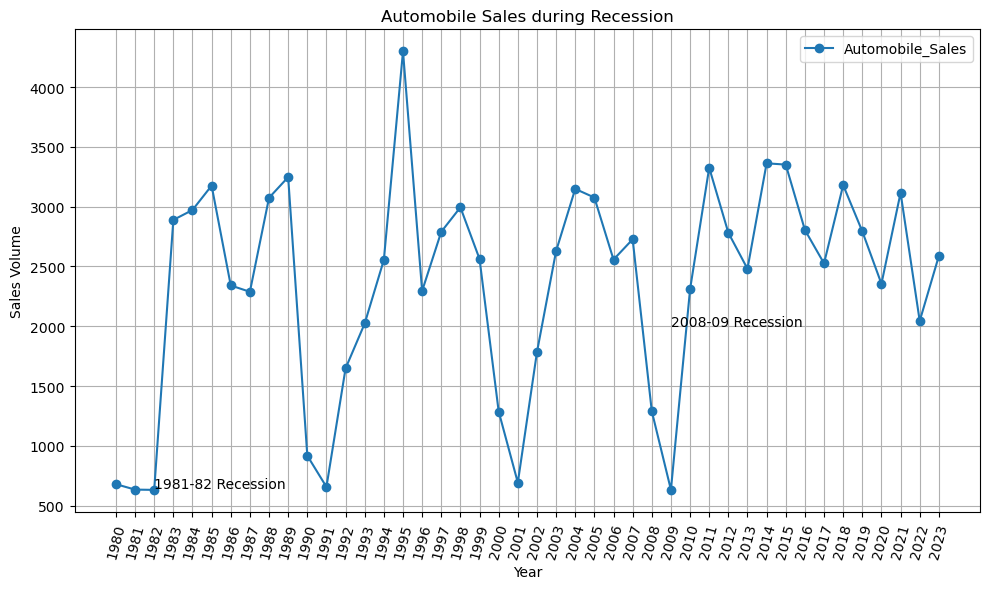

In [29]:
# Group the data by 'Year' and calculate the mean sales for each year
df_grouped = df.groupby('Year')['Automobile_Sales'].mean()

# Create a figure and plot the data as a line chart
plt.figure(figsize=(10, 6))
df_line = df_grouped  # Data for plotting

# Plot the data
df_line.plot(kind='line', marker='o')

# Adding ticks on x-axis with all the years
plt.xticks(list(range(1980, 2024)), rotation=75)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')

# Adding annotations for recession years
plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, 2000, '2008-09 Recession')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

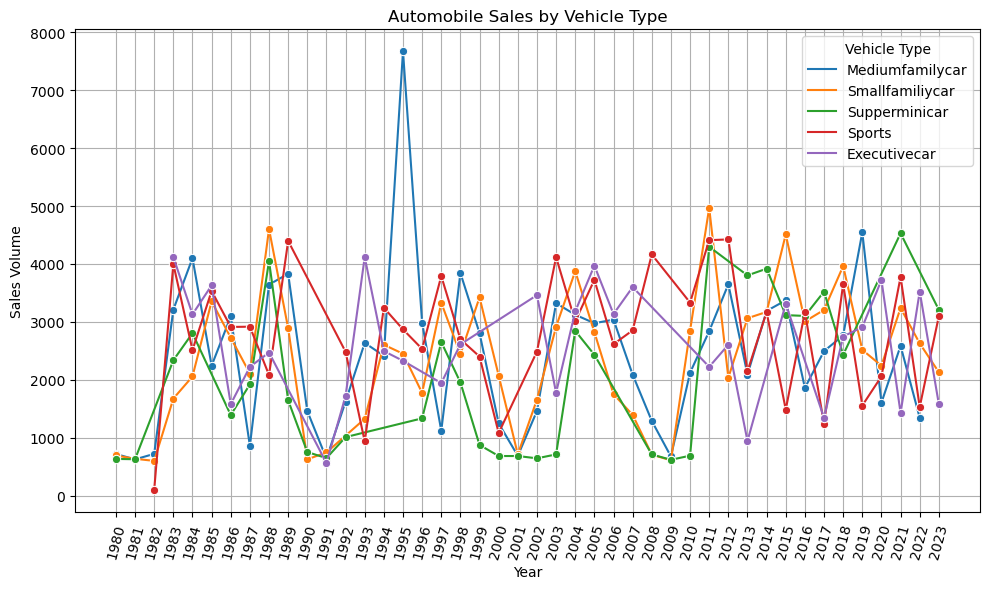

In [30]:
# Group the data by 'Year' and 'Vehicle_Type', calculate the mean sales for each year and type
df_grouped = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create a figure and plot the data as a line chart
plt.figure(figsize=(10, 6))

# Use Seaborn to plot multiple lines based on 'Vehicle_Type'
sns.lineplot(data=df_grouped, x='Year', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

# Adding ticks on x-axis with all the years
plt.xticks(list(range(1980, 2024)), rotation=75)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales by Vehicle Type')

# Adding legend
plt.legend(title='Vehicle Type')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

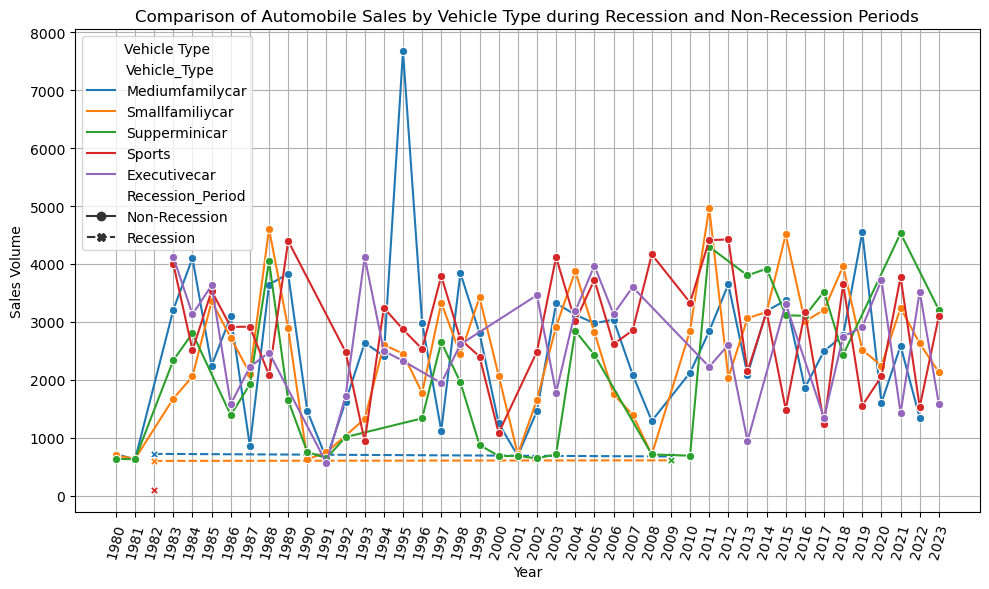

In [31]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Define the recession years
recession_years = [1982, 2009]

# Add a new column 'Recession_Period'
df_copy['Recession_Period'] = df_copy['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

# Group the data by 'Year', 'Vehicle_Type', and 'Recession_Period'
df_grouped = df_copy.groupby(['Year', 'Vehicle_Type', 'Recession_Period'])['Automobile_Sales'].mean().reset_index()

# Create a figure and plot the data using Seaborn's lineplot
plt.figure(figsize=(10, 6))

# Use Seaborn to plot multiple lines based on 'Vehicle_Type' and 'Recession_Period'
sns.lineplot(data=df_grouped, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession_Period', markers=True)

# Adding ticks on x-axis with all the years
plt.xticks(list(range(1980, 2024)), rotation=75)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Comparison of Automobile Sales by Vehicle Type during Recession and Non-Recession Periods')

# Adding legend
plt.legend(title='Vehicle Type')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.

In [32]:
# URL containing the CSV data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Load the data
response = requests.get(URL)
gdp_df = pd.read_csv(URL)

# Print the first few rows
print(gdp_df.head())


        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

In [33]:
# Create a copy of the DataFrame to avoid modifying the original data
gdp_df_copy = gdp_df.copy()

# Define the recession years
recession_years = [1982, 2009]

# Add a new column 'Recession_Period' to indicate if the year is a recession year
gdp_df_copy['Recession_Period'] = gdp_df_copy['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

print(gdp_df_copy.head())

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

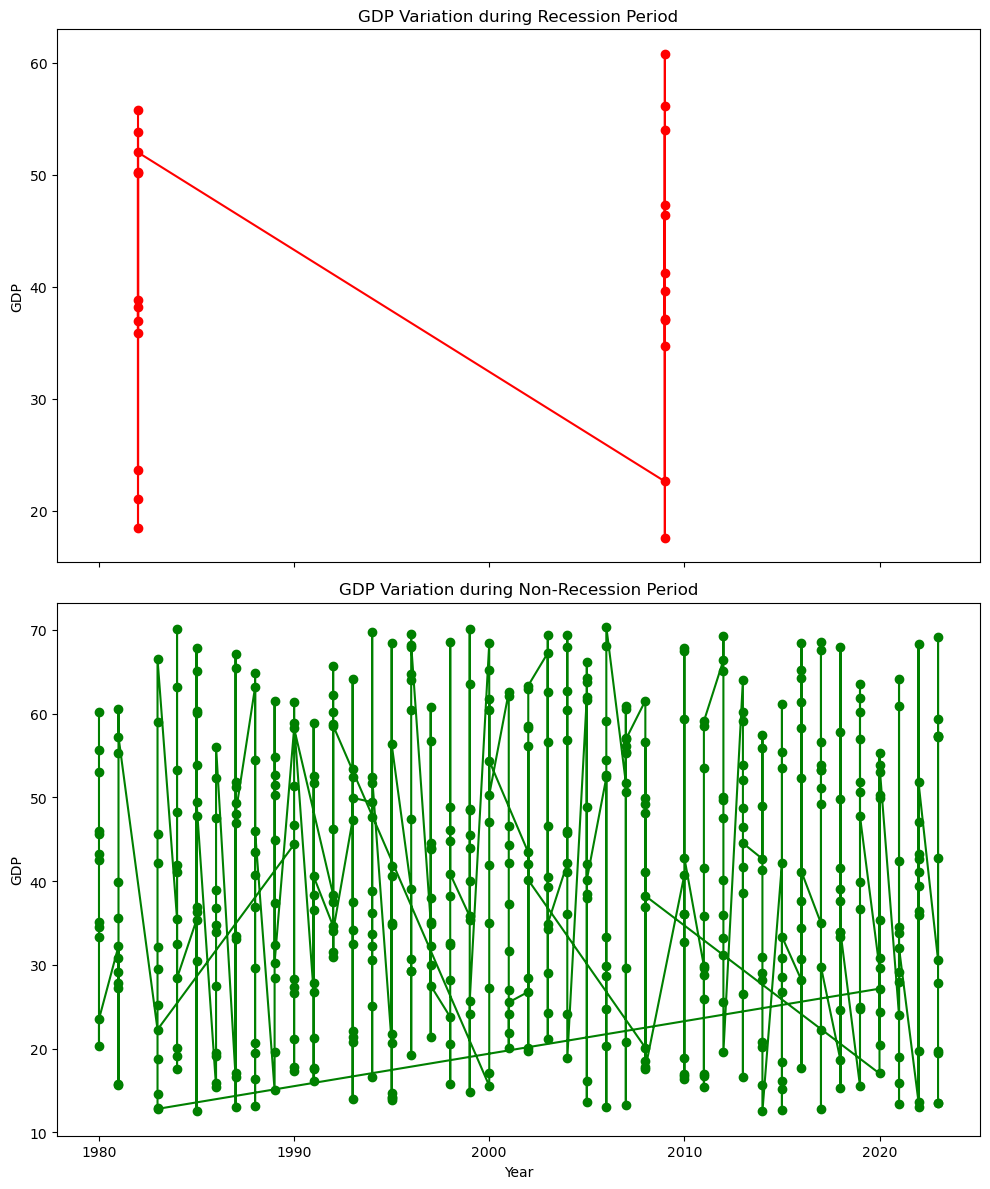

In [34]:
# Separate the data for recession and non-recession periods
recession_df = gdp_df_copy[gdp_df_copy['Recession_Period'] == 'Recession']
non_recession_df = gdp_df_copy[gdp_df_copy['Recession_Period'] == 'Non-Recession']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot GDP for recession period
ax1.plot(recession_df['Year'], recession_df['GDP'], marker='o', color='red')
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')

# Plot GDP for non-recession period
ax2.plot(non_recession_df['Year'], non_recession_df['GDP'], marker='o', color='green')
ax2.set_title('GDP Variation during Non-Recession Period')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')

# Adjust layout
plt.tight_layout()

plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'

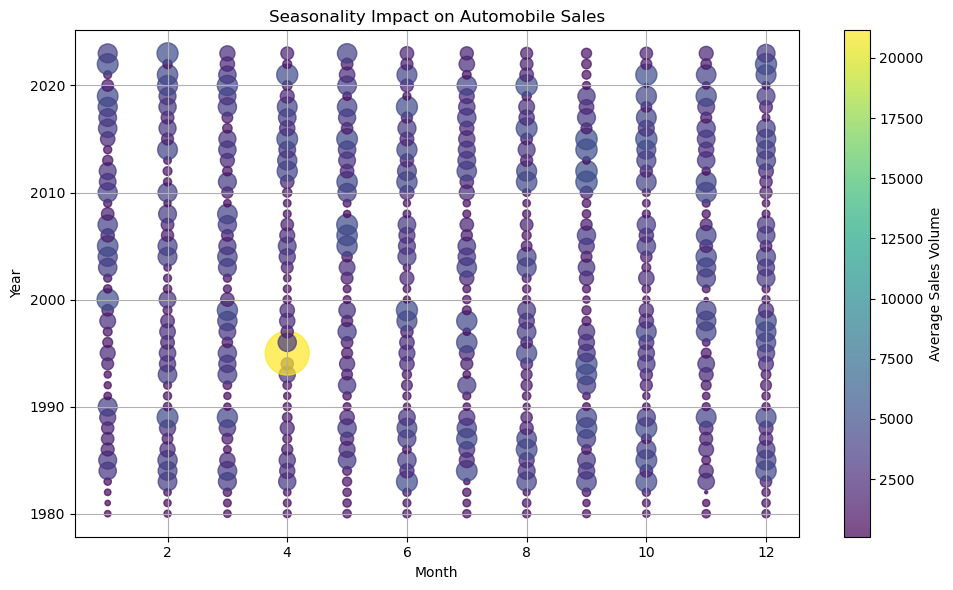

In [35]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate the mean sales for each month
df_monthly = df.groupby(['Year', 'Month'])['Automobile_Sales'].mean().reset_index()

# Calculate seasonality weight
max_sales = df_monthly['Automobile_Sales'].max()
df_monthly['Seasonality_Weight'] = df_monthly['Automobile_Sales'] / max_sales

# Create a bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_monthly['Month'], df_monthly['Year'], s=df_monthly['Seasonality_Weight'] * 1000, c=df_monthly['Automobile_Sales'], cmap='viridis', alpha=0.7)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Seasonality Impact on Automobile Sales')

# Adding a colorbar
cbar = plt.colorbar()
cbar.set_label('Average Sales Volume')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


In [36]:
print(gdp_df_copy.columns)

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City', 'Recession_Period'],
      dtype='object')


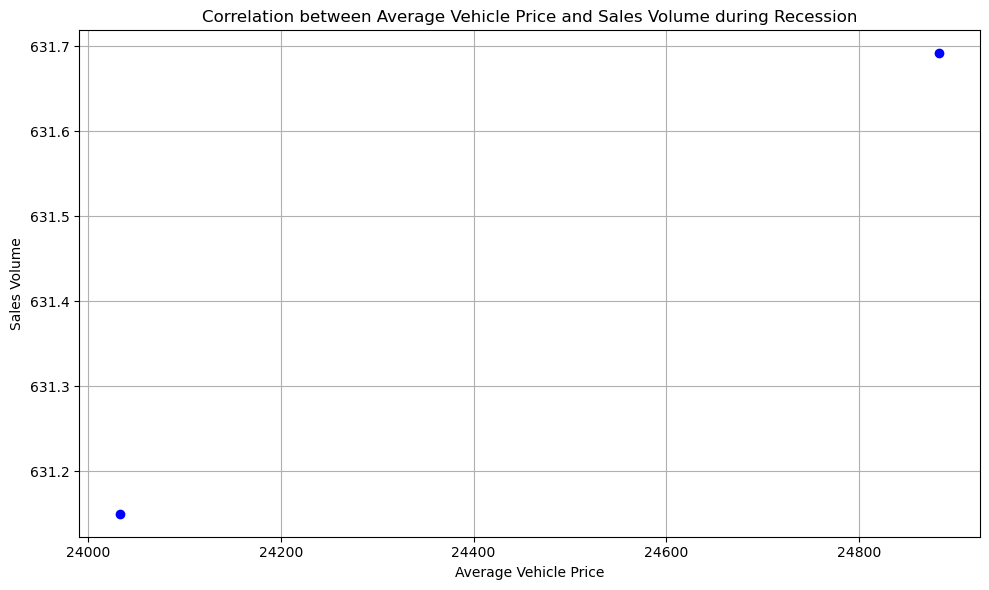

In [37]:
import matplotlib.pyplot as plt

# Filter data for recession periods
recession_df = gdp_df_copy[gdp_df_copy['Recession_Period'] == 'Recession']

# Group data by 'Year' and calculate the mean of 'Price' and 'Automobile_Sales'
grouped_data = recession_df.groupby('Year')[['Price', 'Automobile_Sales']].mean()

# Extract the data for plotting
average_price = grouped_data['Price']
sales_volume = grouped_data['Automobile_Sales']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_price, sales_volume, color='blue', marker='o')

# Adding labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.title('Correlation between Average Vehicle Price and Sales Volume during Recession')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 

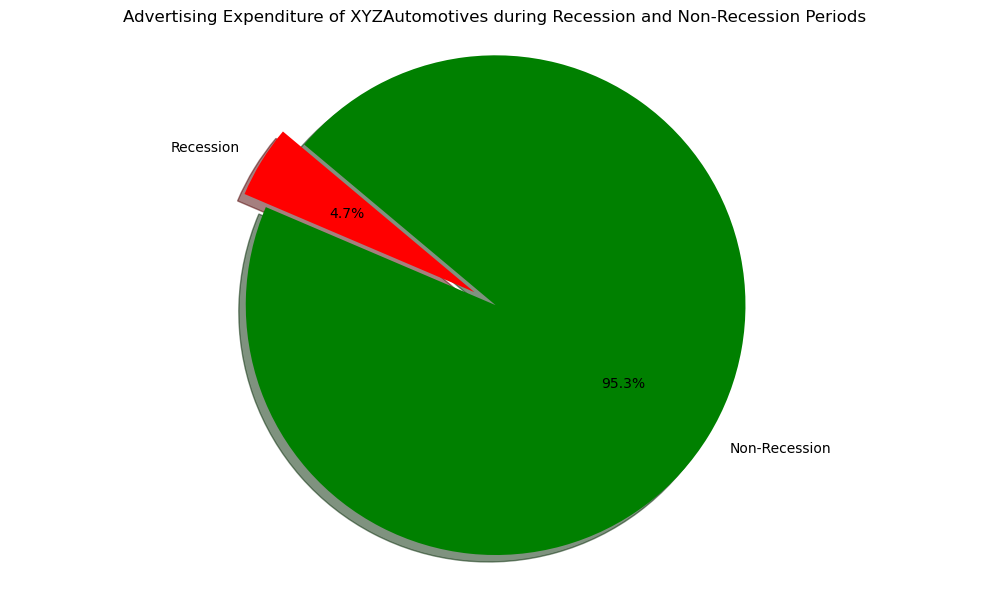

In [38]:
# Load the automobile sales data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

# Define the recession years
recession_years = [1982, 2009]

# Filter data for recession and non-recession periods
recession_df = df[df['Year'].isin(recession_years)]
non_recession_df = df[~df['Year'].isin(recession_years)]

# Calculate advertising expenditure
recession_advertising_expenditure = recession_df.groupby('Year')['Advertising_Expenditure'].sum()
non_recession_advertising_expenditure = non_recession_df.groupby('Year')['Advertising_Expenditure'].sum()

# Create a pie chart
plt.figure(figsize=(10, 6))

# Labels for the pie chart
labels = ['Recession', 'Non-Recession']

# Data for the pie chart
recession_sum = recession_advertising_expenditure.sum()
non_recession_sum = non_recession_advertising_expenditure.sum()
sizes = [recession_sum, non_recession_sum]

# Colors for different sections
colors = ['red', 'green']


explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Advertising Expenditure of XYZAutomotives during Recession and Non-Recession Periods')

# Display the pie chart
plt.tight_layout()
plt.show()


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total sales during recessions? 
#### Create another pie plot to display the total advertisement expenditure for each vehicle type

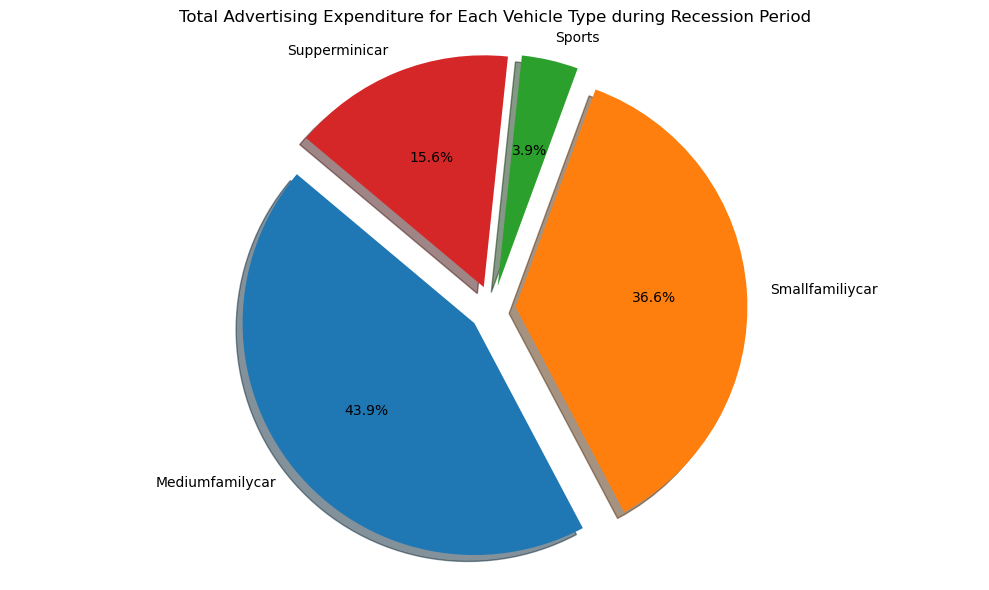

In [39]:
# Load the automobile sales data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

# Define the recession years
recession_years = [1982, 2009]

# Filter data for recession period and relevant columns
recession_df = df[df['Year'].isin(recession_years)][['Vehicle_Type', 'Advertising_Expenditure']]

# Calculate total advertising expenditure for each vehicle type during recession period
vehicle_type_advertising = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart
plt.figure(figsize=(10, 6))

# Labels for the pie chart
labels = vehicle_type_advertising.index

# Data for the pie chart
sizes = vehicle_type_advertising.values

explode = [0.1] * len(labels)

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Total Advertising Expenditure for Each Vehicle Type during Recession Period')

# Display the pie chart
plt.tight_layout()
plt.show()


### TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
#### You can create a countplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'

In [40]:
print(gdp_df_copy.columns)

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City', 'Recession_Period'],
      dtype='object')


C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\2250694552.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



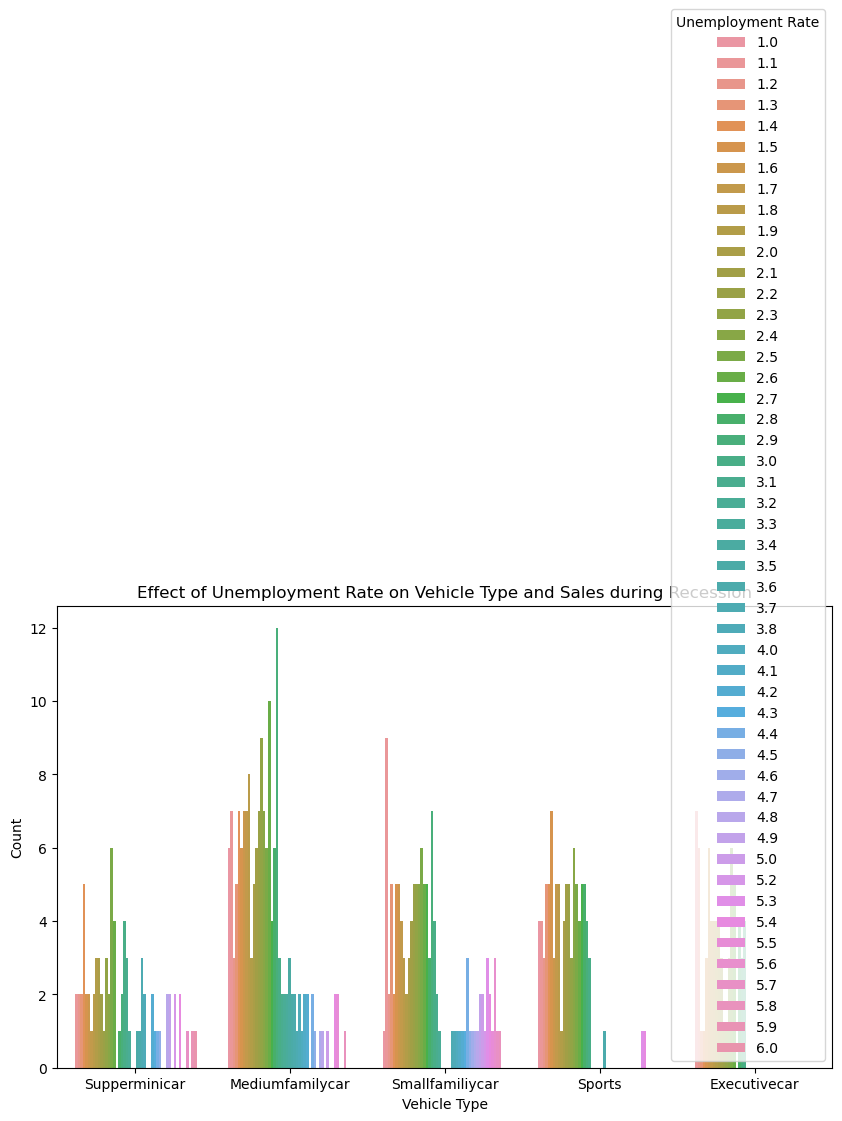

In [41]:
# Create a countplot to analyze the effect of unemployment rate
plt.figure(figsize=(10, 6))
sns.countplot(data=gdp_df_copy, x='Vehicle_Type', hue='unemployment_rate')

# Adding labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession')

# Adding legend
plt.legend(title='Unemployment Rate')

# Display the plot
plt.tight_layout()
plt.show()


### Task 2.1 - Create a Dash application and give it a meaningful title.

In [53]:
!pip install dash

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div(
    style={'textAlign': 'center', 'backgroundColor': '#503D36', 'padding': '20px'},
    children=[
        html.H1(
            children='Automobile Sales Statistics Dashboard',
            style={'color': 'white', 'fontSize': 24}
        ),
        # Add more components here
    ]
)

if __name__ == "__main__":
    app.run_server(debug=True)


### Task 2.2 - Add drop-downs to your dashboard with appropriate title and options.

In [54]:
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'textAlign': 'center', 'backgroundColor': '#503D36', 'padding': '20px'},
    children=[
        html.H1(
            children='Automobile Sales Statistics Dashboard',
            style={'color': 'white', 'fontSize': 24}
        ),
        dcc.Dropdown(
            id='car-dropdown',
            options=[
                {'label': 'Toyota', 'value': 'toyota'},
                {'label': 'Honda', 'value': 'honda'},
                {'label': 'Ford', 'value': 'ford'},
                {'label': 'Chevrolet', 'value': 'chevrolet'}
            ],
            value='toyota',  # Default value
            style={'width': '50%', 'margin': 'auto'}
        ),
        # Add more components here
    ]
)

if __name__ == "__main__":
    app.run_server(debug=True)


### Task 2.3 - Add a division for output display with appropriate 'id' and 'classname'

In [55]:
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'textAlign': 'center', 'backgroundColor': '#503D36', 'padding': '20px'},
    children=[
        html.H1(
            children='Automobile Sales Statistics Dashboard',
            style={'color': 'white', 'fontSize': 24}
        ),
        dcc.Dropdown(
            id='car-dropdown',
            options=[
                {'label': 'Toyota', 'value': 'toyota'},
                {'label': 'Honda', 'value': 'honda'},
                {'label': 'Ford', 'value': 'ford'},
                {'label': 'Chevrolet', 'value': 'chevrolet'}
            ],
            value='toyota',
            style={'width': '50%', 'margin': 'auto'}
        ),
        html.Div(
            id='output-container',
            className='chart-grid',
            children=[
                # Output content
            ],
            style={'margin-top': '20px', 'display': 'flex', 'flexWrap': 'wrap'}
        ),
    ]
)

if __name__ == "__main__":
    app.run_server(debug=True)


### Task 2.4 - Creating callbacks; define the callback function to update the input container based on the selected statistics and output container.

In [56]:
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'textAlign': 'center', 'backgroundColor': '#503D36', 'padding': '20px'},
    children=[
        html.H1(
            children='Automobile Sales Statistics Dashboard',
            style={'color': 'white', 'fontSize': 24}
        ),
        dcc.Dropdown(
            id='report-dropdown',
            options=[
                {'label': 'Recession Statistics', 'value': 'recession'},
                {'label': 'Yearly Statistics', 'value': 'yearly'}
            ],
            value='recession',
            style={'width': '50%', 'margin': 'auto'}
        ),
        dcc.Checklist(
            id='input-container',
            options=[
                {'label': 'Option 1', 'value': 'option1'},
                {'label': 'Option 2', 'value': 'option2'}
            ],
            value=['option1'],
            style={'margin-top': '10px', 'display': 'none'}  # Initially hidden
        ),
        html.Div(
            id='output-container',
            className='chart-grid',
            children=[
                # Output content will be displayed here
            ],
            style={'margin-top': '20px', 'display': 'flex', 'flexWrap': 'wrap'}
        ),
    ]
)

# Callback to enable or disable the input container based on the selected report type
@app.callback(
    Output('input-container', 'style'),
    Input('report-dropdown', 'value')
)
def update_input_container_style(report_type):
    if report_type == 'recession':
        return {'margin-top': '10px', 'display': 'block'}
    else:
        return {'margin-top': '10px', 'display': 'none'}

# Callback to plot the output graphs based on the selected report type
@app.callback(
    Output('output-container', 'children'),
    Input('report-dropdown', 'value')
)
def update_output_container(report_type):
    if report_type == 'recession':
        # Generate and return recession statistics graphs
        return [
            dcc.Graph(
                id='recession-graph1',
                figure={}  # Add your figure details here
            ),
            dcc.Graph(
                id='recession-graph2',
                figure={}  # Add your figure details here
            )
        ]
    elif report_type == 'yearly':
        # Generate and return yearly statistics graphs
        return [
            dcc.Graph(
                id='yearly-graph1',
                figure={}  # Add your figure details here
            ),
            dcc.Graph(
                id='yearly-graph2',
                figure={}  # Add your figure details here
            )
        ]

if __name__ == "__main__":
    app.run_server(debug=True)


### Task 2.5 - Create and display graphs for Recession Report Statistics

In [57]:
# Sample data (replace with your actual data)
data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Month': [1, 2, 1, 2, 1, 2],
    'Brand': ['Toyota', 'Toyota', 'Toyota', 'Toyota', 'Honda', 'Honda'],
    'Sales': [100, 120, 90, 110, 130, 150],
    'Recession': [False, False, True, True, False, False]
}

df = pd.DataFrame(data)

app = dash.Dash(__name__)

app.layout = html.Div(
    style={'textAlign': 'center', 'backgroundColor': '#503D36', 'padding': '20px'},
    children=[
        html.H1(
            children='Automobile Sales Statistics Dashboard',
            style={'color': 'white', 'fontSize': 24}
        ),
        dcc.Dropdown(
            id='report-dropdown',
            options=[
                {'label': 'Recession Statistics', 'value': 'recession'},
                {'label': 'Yearly Statistics', 'value': 'yearly'}
            ],
            value='recession',
            style={'width': '50%', 'margin': 'auto'}
        ),
        dcc.Checklist(
            id='input-container',
            options=[
                {'label': 'Option 1', 'value': 'option1'},
                {'label': 'Option 2', 'value': 'option2'}
            ],
            value=['option1'],
            style={'margin-top': '10px', 'display': 'none'}  # Initially hidden
        ),
        html.Div(
            id='output-container',
            className='chart-grid',
            children=[
                # Output content will be displayed here
            ],
            style={'margin-top': '20px', 'display': 'flex', 'flexWrap': 'wrap'}
        ),
    ]
)

# Callback to enable or disable the input container based on the selected report type
@app.callback(
    Output('input-container', 'style'),
    Input('report-dropdown', 'value')
)
def update_input_container_style(report_type):
    if report_type == 'recession':
        return {'margin-top': '10px', 'display': 'block'}
    else:
        return {'margin-top': '10px', 'display': 'none'}

# Callback to plot the output graphs based on the selected report type
@app.callback(
    Output('output-container', 'children'),
    Input('report-dropdown', 'value')
)
def update_output_container(report_type):
    if report_type == 'recession':
        # Prepare data for recession statistics
        recession_data = df.groupby(['Year', 'Recession']).sum().reset_index()

        # Create and return graphs
        graphs = []
        for year, data_year in recession_data.groupby('Year'):
            fig = px.bar(data_year, x='Recession', y='Sales', color='Recession', labels={'Sales': 'Total Sales'})
            fig.update_layout(title=f'Recession Statistics for Year {year}')
            graphs.append(dcc.Graph(figure=fig))

        return graphs
    elif report_type == 'yearly':
        # Generate and return yearly statistics graphs
        return []

if __name__ == "__main__":
    app.run_server(debug=True)

C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\2677530253.py:69: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\2677530253.py:69: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\2677530253.py:69: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\2677530253.py:69: FutureWarning:

### Task 2.6 - Create and display graphs for Yearly Report Statistics

In [59]:
# Sample data (replace with your actual data)
data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Month': [1, 2, 1, 2, 1, 2],
    'Brand': ['Toyota', 'Toyota', 'Toyota', 'Toyota', 'Honda', 'Honda'],
    'Sales': [100, 120, 90, 110, 130, 150],
    'Recession': [False, False, True, True, False, False]
}

df = pd.DataFrame(data)

app = dash.Dash(__name__)

app.layout = html.Div(
    style={'textAlign': 'center', 'backgroundColor': '#503D36', 'padding': '20px'},
    children=[
        html.H1(
            children='Automobile Sales Statistics Dashboard',
            style={'color': 'white', 'fontSize': 24}
        ),
        dcc.Dropdown(
            id='report-dropdown',
            options=[
                {'label': 'Recession Statistics', 'value': 'recession'},
                {'label': 'Yearly Statistics', 'value': 'yearly'}
            ],
            value='recession',
            style={'width': '50%', 'margin': 'auto'}
        ),
        dcc.Checklist(
            id='input-container',
            options=[
                {'label': 'Option 1', 'value': 'option1'},
                {'label': 'Option 2', 'value': 'option2'}
            ],
            value=['option1'],
            style={'margin-top': '10px', 'display': 'none'}  # Initially hidden
        ),
        html.Div(
            id='output-container',
            className='chart-grid',
            children=[
                # Output content will be displayed here
            ],
            style={'margin-top': '20px', 'display': 'flex', 'flexWrap': 'wrap'}
        ),
    ]
)

# Callback to enable or disable the input container based on the selected report type
@app.callback(
    Output('input-container', 'style'),
    Input('report-dropdown', 'value')
)
def update_input_container_style(report_type):
    if report_type == 'recession':
        return {'margin-top': '10px', 'display': 'block'}
    else:
        return {'margin-top': '10px', 'display': 'none'}

# Callback to plot the output graphs based on the selected report type
@app.callback(
    Output('output-container', 'children'),
    Input('report-dropdown', 'value')
)
def update_output_container(report_type):
    if report_type == 'recession':
        # Prepare data for recession statistics
        recession_data = df.groupby(['Year', 'Recession']).sum().reset_index()

        # Create and return graphs
        graphs = []
        for year, data_year in recession_data.groupby('Year'):
            fig = px.bar(data_year, x='Recession', y='Sales', color='Recession', labels={'Sales': 'Total Sales'})
            fig.update_layout(title=f'Recession Statistics for Year {year}')
            graphs.append(dcc.Graph(figure=fig))

        return graphs
    elif report_type == 'yearly':
        # Prepare data for yearly statistics
        yearly_data = df.groupby('Year').sum().reset_index()

        # Create and return graphs
        graphs = []
        fig = px.bar(yearly_data, x='Year', y='Sales', labels={'Sales': 'Total Sales'})
        fig.update_layout(title='Yearly Statistics')
        graphs.append(dcc.Graph(figure=fig))

        return graphs

if __name__ == "__main__":
    app.run_server(debug=True)


C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\930716715.py:69: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\930716715.py:69: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\930716715.py:69: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\rsald\AppData\Local\Temp\ipykernel_41136\930716715.py:69: FutureWarning:

Th